In [1]:
import foolbox
from foolbox.models import KerasModel
from foolbox.attacks import SaliencyMapAttack
from foolbox.attacks import GradientSignAttack
from foolbox.criteria import TargetClassProbability

import numpy as np
import scipy
import keras
from keras import backend as K
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions

keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import *
def resize_img(img, size):
    img = np.copy(img)
    if K.image_data_format() == 'channels_first':
        factors = (1, 1,
                   float(size[0]) / img.shape[2],
                   float(size[1]) / img.shape[3])
    else:
        factors = (1,
                   float(size[0]) / img.shape[1],
                   float(size[1]) / img.shape[2],
                   1)
    return scipy.ndimage.zoom(img, factors, order=1)

def get_img_and_process(img_path):
    img = load_img(img_path)
    img_arr = img_to_array(img)
    img_arr = img_arr[np.newaxis, :]
    img_arr = resize_img(img_arr, (224, 224, 3))
    return img_arr

vitruvian = get_img_and_process("../imgs/vitruvian.jpg")
wolf = get_img_and_process("../imgs/wolf.jpg")

In [27]:
SMA = SaliencyMapAttack(model=fmodel, criterion=TargetClassProbability(111, p=.2))
adv_rev = SMA(wolf[0, :, :, :], 269)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/foolbox/attacks/base.py:148: UserWarning: SaliencyMapAttack did not find an adversarial, maybe the model or the criterion is not supported by this attack.
  ' attack.'.format(self.name()))


In [12]:
adv

In [22]:
print(adv_rev)

[[[133.       119.       110.      ]
  [137.86546   98.36547  114.86547 ]
  [140.78476  126.78475  117.78475 ]
  ...
  [120.02691  109.02691  107.02691 ]
  [118.02691  107.02691  105.02691 ]
  [126.       115.       113.      ]]

 [[132.5695   118.5695   109.5695  ]
  [134.73674  120.73673  111.73673 ]
  [137.87706   98.37705   89.37705 ]
  ...
  [118.13004  107.13004  105.13004 ]
  [120.454506 109.454506 107.454506]
  [126.64574  115.64574  113.64574 ]]

 [[127.847534 112.847534 105.847534]
  [132.0269    91.52691  110.02691 ]
  [106.8139    40.813904  33.813904]
  ...
  [119.607994 108.607994 106.607994]
  [121.88023  110.88023  108.88023 ]
  [124.5695   113.5695   111.5695  ]]

 ...

 [[105.        90.        87.      ]
  [102.855194  87.855194  84.855194]
  [100.51905   85.51905   82.51905 ]
  ...
  [ 64.22122   67.22122   76.22122 ]
  [ 47.942448  51.942448  60.942448]
  [ 47.721973  54.721973  62.721973]]

 [[107.35426   92.35426   89.35426 ]
  [101.20946   86.20946   83.20946 ]


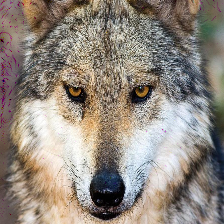

In [23]:
array_to_img(adv_rev)

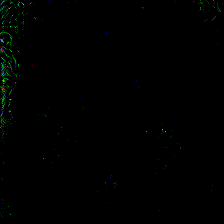

In [24]:
array_to_img(wolf[0] - adv_rev)

In [26]:
kmodel.predict(adv_rev[np.newaxis, :])[0, 111]

6.433151e-06